In [1]:
!pip install pandas statsmodels pyreadstat


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 2.4/2.4 MB 2.5 MB/s eta 0:00:00


In [2]:
import pandas as pd

url = "https://stats.idre.ucla.edu/stat/stata/dae/binary.dta"
data = pd.read_stata(url)

data.head()


,admit,gre,gpa,rank
0,0.0,380.0,3.61,3.0
1,1.0,660.0,3.67,3.0
2,1.0,800.0,4.00,1.0
3,1.0,640.0,3.19,4.0
4,0.0,520.0,2.93,4.0


In [3]:

data.describe()

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    float32
 1   gre     400 non-null    float32
 2   gpa     400 non-null    float32
 3   rank    400 non-null    float32
dtypes: float32(4)
memory usage: 9.4 KB


In [4]:
import statsmodels.api as sm

X = data[['gre', 'gpa', 'rank']]
X = pd.get_dummies(X, columns=['rank'], drop_first=True) 

X = sm.add_constant(X)


y = data['admit']


model = sm.Logit(y, X)
result = model.fit()


print(result.summary())


Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Thu, 24 Jul 2025   Pseudo R-squ.:                 0.08292
Time:                        08:43:02   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9900      1.140     -3.500      0.000      -6.224      -1.756
gre            0.0023      0.

In [5]:

data['pred_prob'] = result.predict(X)

data[['admit', 'pred_prob']].head(10)


,admit,pred_prob
0,0.0,0.172627
1,1.0,0.292175
2,1.0,0.738408
3,1.0,0.178385
4,0.0,0.118354
5,1.0,0.369970
6,1.0,0.419246
7,0.0,0.217003
8,1.0,0.200735
9,0.0,0.517868


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score

data['predicted'] = data['pred_prob'] >= 0.5

cm = confusion_matrix(data['admit'], data['predicted'])
print("Confusion Matrix:\n", cm)


acc = accuracy_score(data['admit'], data['predicted'])
print("Accuracy: {:.2f}".format(acc))


Confusion Matrix:
 [[254  19]
 [ 97  30]]
Accuracy: 0.71


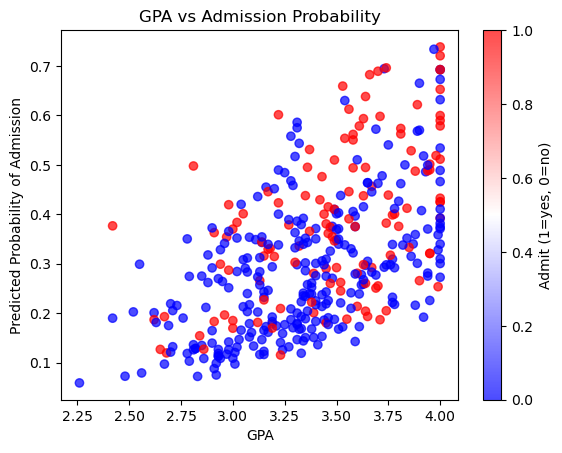

In [7]:
import matplotlib.pyplot as plt

plt.scatter(data['gpa'], data['pred_prob'], c=data['admit'], cmap='bwr', alpha=0.7)
plt.xlabel('GPA')
plt.ylabel('Predicted Probability of Admission')
plt.title('GPA vs Admission Probability')
plt.colorbar(label='Admit (1=yes, 0=no)')
plt.show()
